In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [6]:
df.shape

(4238, 16)

In [7]:
df['education'] = df['education'].fillna(df['education'].mean())

In [8]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mean())

In [9]:
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mean())

In [10]:
df['totChol'] = df['totChol'].fillna(df['totChol'].mean())

In [11]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [12]:
df['glucose'] = df['glucose'].fillna(df['glucose'].mean())

In [13]:
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mean())

In [14]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
x = df.drop(['TenYearCHD'],axis=1)

In [17]:
y = df['TenYearCHD']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [21]:
lg = LogisticRegression()

In [22]:
lg.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
pred1 = lg.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [25]:
accuracy_score(y_test,pred1)

0.8337264150943396

In [26]:
cm = confusion_matrix(y_test,pred1)

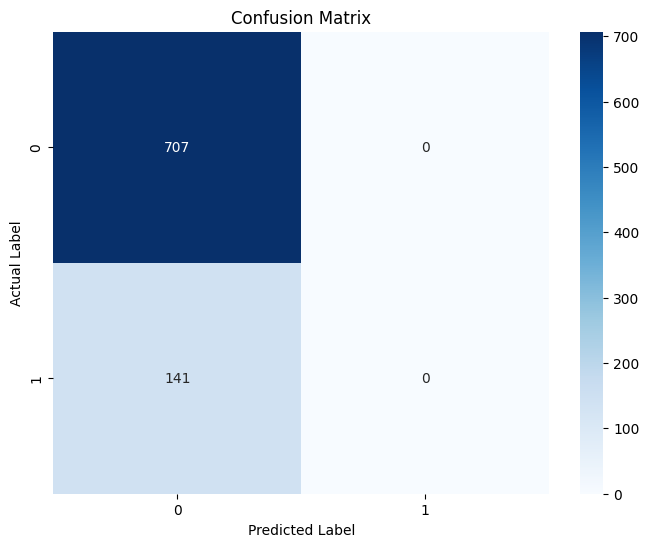

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [28]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

In [29]:

param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': stats.loguniform(1e-3, 1e2),   # random continuous sampling
    'solver': ['liblinear', 'saga'],
    'max_iter': [500],
    'class_weight': ['balanced', None],
    'l1_ratio': [0.1, 0.5, 0.9]  # only matters if elasticnet
}

reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=param_dist,
    n_iter=30,   # number of random samples
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

reg.fit(x_train, y_train)



Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x794895d0f550>,
                                        'class_weight': ['balanced', None],
                                        'l1_ratio': [0.1, 0.5, 0.9],
                                        'max_iter': [500],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, verbose=1)

In [30]:
reg.best_score_

0.8533923303834807

In [31]:
reg.best_params_

{'C': 0.0019517224641449498,
 'class_weight': None,
 'l1_ratio': 0.1,
 'max_iter': 500,
 'penalty': 'elasticnet',
 'solver': 'saga'}

<h1> Lets drop Unncessary columns </h1>

In [32]:
df.shape

(4238, 16)

In [33]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=10)  # choose top 10 features
X_new = selector.fit_transform(x, y)

print("Selected Features Indexes:", selector.get_support(indices=True))
selected_indexes = selector.get_support(indices=True)

Selected Features Indexes: [ 0  1  4  5  7  8  9 10 11 14]


In [34]:
x_selected = x.iloc[:, selected_indexes]
print("Final Columns Shape:", x_selected.shape)

Final Columns Shape: (4238, 10)


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x_selected,y,test_size=0.2,random_state=2)

In [36]:
lg.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
pred2 = lg.predict(x_test)

In [38]:
accuracy_score(y_test,pred2) #slight better

0.8290094339622641

In [39]:
#cmm = confusion_matrix(y_test,pree)

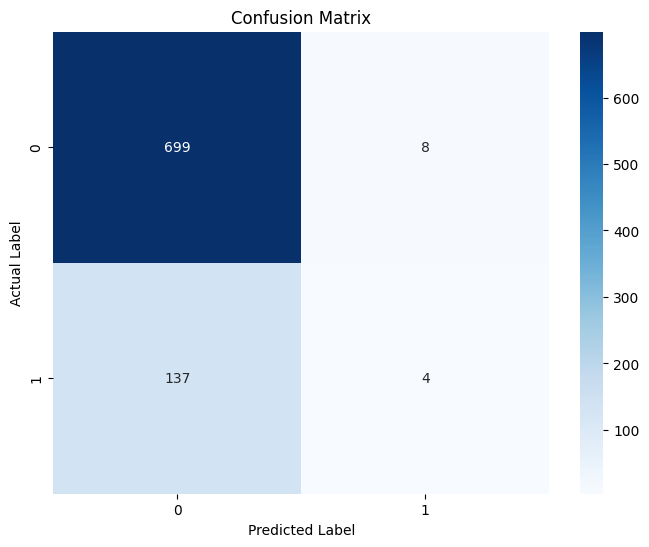

In [40]:
cmm = confusion_matrix(y_test,pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cmm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [41]:
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': stats.loguniform(1e-3, 1e2),   # random continuous sampling
    'solver': ['liblinear', 'saga'],
    'max_iter': [500],
    'class_weight': ['balanced', None],
    'l1_ratio': [0.1, 0.5, 0.9]  # only matters if elasticnet
}

reg2 = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=param_dist,
    n_iter=30,   # number of random samples
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

reg2.fit(x_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x794895d7c550>,
                                        'class_weight': ['balanced', None],
                                        'l1_ratio': [0.1, 0.5, 0.9],
                                        'max_iter': [500],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, verbose=1)

In [42]:
reg2.best_score_ #wow

0.8533923303834807

In [43]:
reg2.best_params_

{'C': 0.09984006580328653,
 'class_weight': None,
 'l1_ratio': 0.9,
 'max_iter': 500,
 'penalty': 'l2',
 'solver': 'saga'}

Lets drop some more columns

In [44]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=7)  # choose top 10 features
X_new = selector.fit_transform(x, y)

print("Selected Features Indexes:", selector.get_support(indices=True))
selected_indexes = selector.get_support(indices=True)

Selected Features Indexes: [ 1  4  7  9 10 11 14]


In [45]:
x_selected = x.iloc[:, selected_indexes]
print("Final Columns Shape:", x_selected.shape)

Final Columns Shape: (4238, 7)


In [46]:
x_train,x_test,y_train,y_test = train_test_split(x_selected,y,test_size=0.2,random_state=2)

In [47]:
lg.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
pred3 = lg.predict(x_test)

In [49]:
#accuracy_score(y_test,pree) #slightly more better

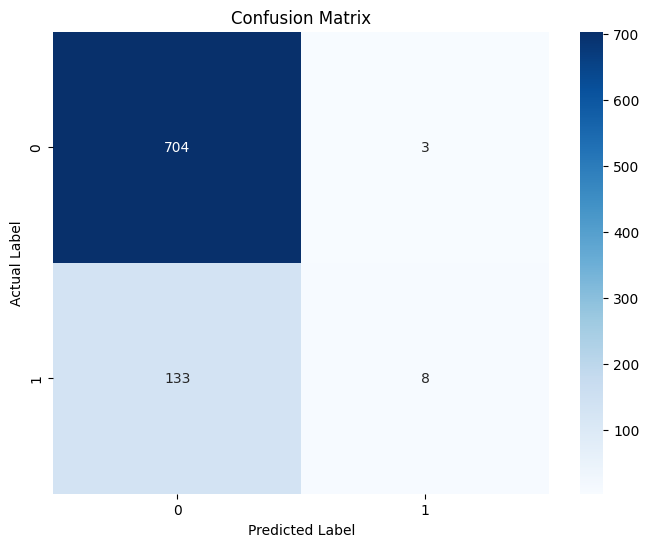

In [50]:
cmmm = confusion_matrix(y_test,pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(cmmm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [51]:
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': stats.loguniform(1e-3, 1e2),   # random continuous sampling
    'solver': ['liblinear', 'saga'],
    'max_iter': [500],
    'class_weight': ['balanced', None],
    'l1_ratio': [0.1, 0.5, 0.9]  # only matters if elasticnet
}

reg3 = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=param_dist,
    n_iter=30,   # number of random samples
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

reg3.fit(x_train, y_train)



Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79489979e550>,
                                        'class_weight': ['balanced', None],
                                        'l1_ratio': [0.1, 0.5, 0.9],
                                        'max_iter': [500],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, verbose=1)

In [52]:
reg3.best_score_

0.8530973451327434

In [53]:
reg3.best_params_

{'C': 0.09984006580328653,
 'class_weight': None,
 'l1_ratio': 0.9,
 'max_iter': 500,
 'penalty': 'l2',
 'solver': 'saga'}